<a href="https://colab.research.google.com/github/tomunizua/summative_bananaguard/blob/main/Summative_Intro_to_ml_TheodoraOmunizua_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation
Project Name: Banana Guard



In [ ]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
from PIL import Image
import tensorflow as tf
import itertools
import pickle
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump, load

# The Dataset
> ***Brief Description:***
Banana Xanthomonas Wilt (BXW) threatens Rwanda's vital banana crop, causing severe yield losses. This project uses image recognition and machine learning to develop a model for early BXW detection.  The dataset, from Roboflow, contains labeled images of healthy and BXW-infected banana leaves, pre-split into training, validation, and test sets.


In [ ]:
# --- Modularized Data Loading and Dataset Creation ---

def load_data(train_csv, valid_csv, test_csv):
    """Loads data from CSV files and returns Pandas DataFrames."""
    train_df = pd.read_csv(train_csv)
    valid_df = pd.read_csv(valid_csv)
    test_df = pd.read_csv(test_csv)
    return train_df, valid_df, test_df

def encode_labels(train_df, valid_df, test_df):
    """Performs label encoding, fitting only on the training data."""
    le = LabelEncoder()
    train_df['class_encoded'] = le.fit_transform(train_df['class'])
    valid_df['class_encoded'] = le.transform(valid_df['class'])
    test_df['class_encoded'] = le.transform(test_df['class'])
    return le, train_df, valid_df, test_df

def load_image(image_path):
    """Loads and resizes an image."""
    image_string = tf.io.read_file(image_path)
    image_decoded = tf.image.decode_jpeg(image_string, channels=3)
    image_resized = tf.image.resize(image_decoded, [128, 128])
    return image_resized

def create_dataset(df, image_folder):
    """Creates a TensorFlow Dataset from a DataFrame and image folder."""
    image_paths = df['filename'].apply(lambda x: os.path.join(image_folder, x)).tolist()
    labels = df['class_encoded'].tolist()

    image_paths_tensor = tf.constant(image_paths)
    labels_tensor = tf.constant(labels)

    dataset = tf.data.Dataset.from_tensor_slices((image_paths_tensor, labels_tensor))

    def process_path(image_path, label):
        image = load_image(image_path)
        return image, label

    dataset = dataset.map(process_path)
    return dataset


# --- Main Data Loading and Dataset Creation ---

train_df, valid_df, test_df = load_data(
    '/content/dataset/train/_annotations.csv',
    '/content/dataset/valid/_annotations.csv',
    '/content/dataset/test/_annotations.csv'
)

le, train_df, valid_df, test_df = encode_labels(train_df, valid_df, test_df)

train_image_folder = '/content/dataset/train/images'
valid_image_folder = '/content/dataset/valid/images'
test_image_folder = '/content/dataset/test/images'

train_dataset = create_dataset(train_df, train_image_folder)
valid_dataset = create_dataset(valid_df, valid_image_folder)
test_dataset = create_dataset(test_df, test_image_folder)


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://media2.dev.to/dynamic/image/width=1000,height=420,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fi%2F1inc9c00m35q12lidqde.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import load_model

In [ ]:
# --- Model Definition ---

def create_model(input_shape, num_classes):
    """Creates the model architecture no regularization or optimizer.
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# --- Main Execution ---

model = create_model((128, 128, 3), len(le.classes_))

# Model Compilation
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Batching
train_dataset = train_dataset.batch(32)
valid_dataset = valid_dataset.batch(32)
test_dataset = test_dataset.batch(32)

#Training
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=10)

# Save the model
model.save("no_optimization_model.keras")

loaded_model = tf.keras.models.load_model("no_optimization_model.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6480 - loss: 304.1873 - val_accuracy: 0.9007 - val_loss: 0.2650
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8564 - loss: 1.3338 - val_accuracy: 0.4539 - val_loss: 13.2143
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7655 - loss: 2.0812 - val_accuracy: 0.6064 - val_loss: 1.4193
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7525 - loss: 0.6797 - val_accuracy: 0.8901 - val_loss: 0.2863
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8887 - loss: 1.1415 - val_accuracy: 0.9894 - val_loss: 0.0577
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9646 - loss: 0.1206 - val_accuracy: 0.9752 - val_loss: 0.0902
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9667 - loss: 0.1016 - val_accuracy: 0.9362 - val_loss: 0.1361
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9198 - loss: 0.4965 - val_accuracy: 0.9326 - val_lo

# Task: Print out the Final Model Accuracy and plot the Loss curve

Test accuracy: 0.972, Train accuracy: 0.994


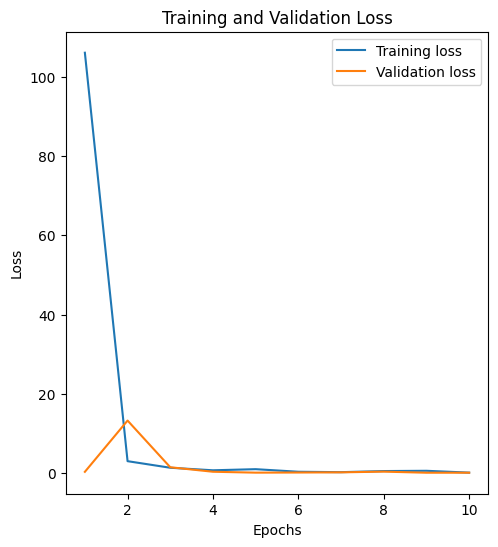

In [ ]:
# ---  Evaluation and Plotting ---

_, test_results = model.evaluate(test_dataset, verbose=0)
_, train_results = model.evaluate(train_dataset, verbose=0)
print('Test accuracy: %.3f, Train accuracy: %.3f' % (test_results, train_results))


def loss_curve_plot(history):
    """Plots the loss curve."""
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  # Loss plot
    plt.plot(epochs, history.history['loss'], label='Training loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

loss_curve_plot(history)  # Call the plotting function

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6799 - loss: 143.8254 - val_accuracy: 0.7837 - val_loss: 1.7288
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8984 - loss: 0.6956 - val_accuracy: 0.9929 - val_loss: 0.0742
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9867 - loss: 0.0963 - val_accuracy: 0.9965 - val_loss: 0.0286
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9805 - loss: 0.1054 - val_accuracy: 0.9929 - val_loss: 0.0375
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9873 - loss: 0.0864 - val_accuracy: 0.9965 - val_loss: 0.0411
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9827 - loss: 0.0657 - val_accuracy: 0.9929 - val_loss: 0.0571
Test accuracy: 0.972, Train accuracy: 0.999


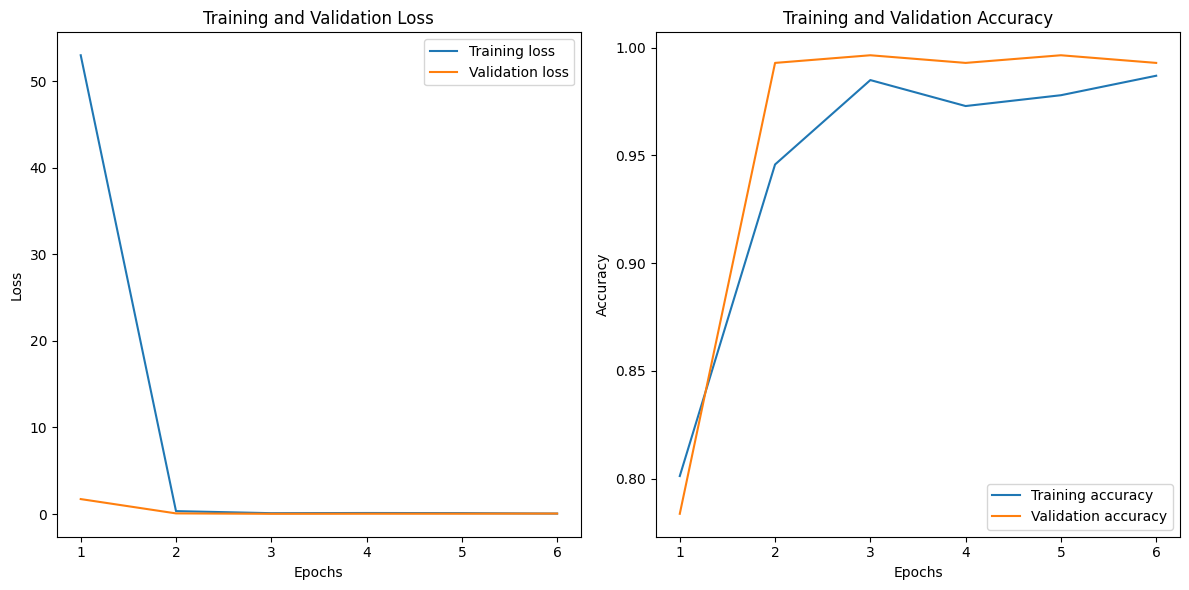

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


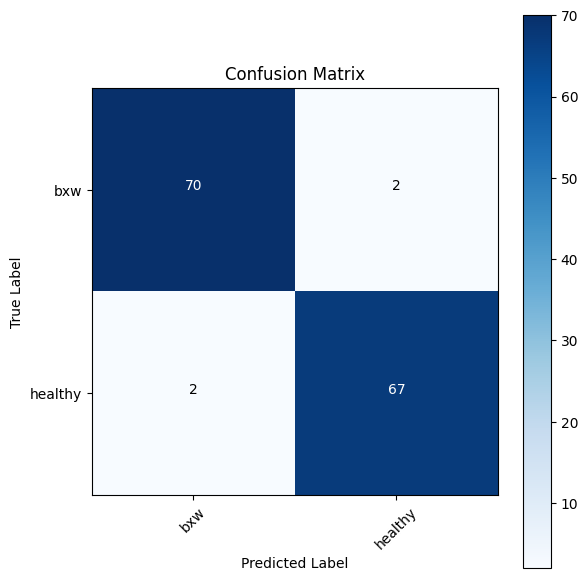

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
              precision    recall  f1-score   support

         bxw       0.97      0.97      0.97        72
     healthy       0.97      0.97      0.97        69

    accuracy                           0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141



In [ ]:
# --- Model 2 definition ---

def model_2(input_shape, num_classes):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))  # Dropout layer added
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adam optimizer
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# --- Main Execution ---

# Create the model
model = model_2((128, 128, 3), len(le.classes_))

# 5. Training with Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)  # Define early stopping
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=10, callbacks=[early_stopping])

# Save the model
model.save("second_model.keras")

# Load the model
loaded_model = tf.keras.models.load_model("second_model.keras")

# ---  Evaluation and Plotting ---
_, test_results = model.evaluate(test_dataset, verbose=0)
_, train_results = model.evaluate(train_dataset, verbose=0)
print('Test accuracy: %.3f, Train accuracy: %.3f' % (test_results, train_results))

# Plotting Function (Loss and Accuracy Curves)
def loss_curve_plot(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  # Loss plot
    plt.plot(epochs, history.history['loss'], label='Training loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)  # Accuracy plot
    plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

loss_curve_plot(history)  # Call the plotting function

# Confusion Matrix and Error Analysis
def plot_confusion_matrix(model, dataset, le):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        y_true.extend(labels.numpy())
        y_pred_batch = model.predict(images)
        y_pred.extend(np.argmax(y_pred_batch, axis=1))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(le.classes_))
    plt.xticks(tick_marks, le.classes_, rotation=45)
    plt.yticks(tick_marks, le.classes_)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(model, test_dataset, le)

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


# Classification Report
y_true = []
y_pred = []
for images, labels in test_dataset:
  y_true.extend(labels.numpy())
  y_pred_batch = model.predict(images)
  y_pred.extend(np.argmax(y_pred_batch, axis=1))

print(classification_report(y_true, y_pred, target_names=le.classes_)) # Print report



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6822 - loss: 472.9534 - val_accuracy: 0.4965 - val_loss: 21.4037
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8396 - loss: 5.1629 - val_accuracy: 0.9752 - val_loss: 0.5968
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8141 - loss: 4.1432 - val_accuracy: 0.8582 - val_loss: 1.2362
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8269 - loss: 1.4648 - val_accuracy: 0.9468 - val_loss: 0.4907
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9458 - loss: 0.5154 - val_accuracy: 0.6702 - val_loss: 1.1414
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.8681 - loss: 0.7096 - val_accuracy: 0.5319 - val_loss: 14.0017
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8751 - loss: 2.8237 - val_accuracy: 0.7447 - val_loss: 2.3606
Test accuracy: 0.759, Train accuracy: 0.784


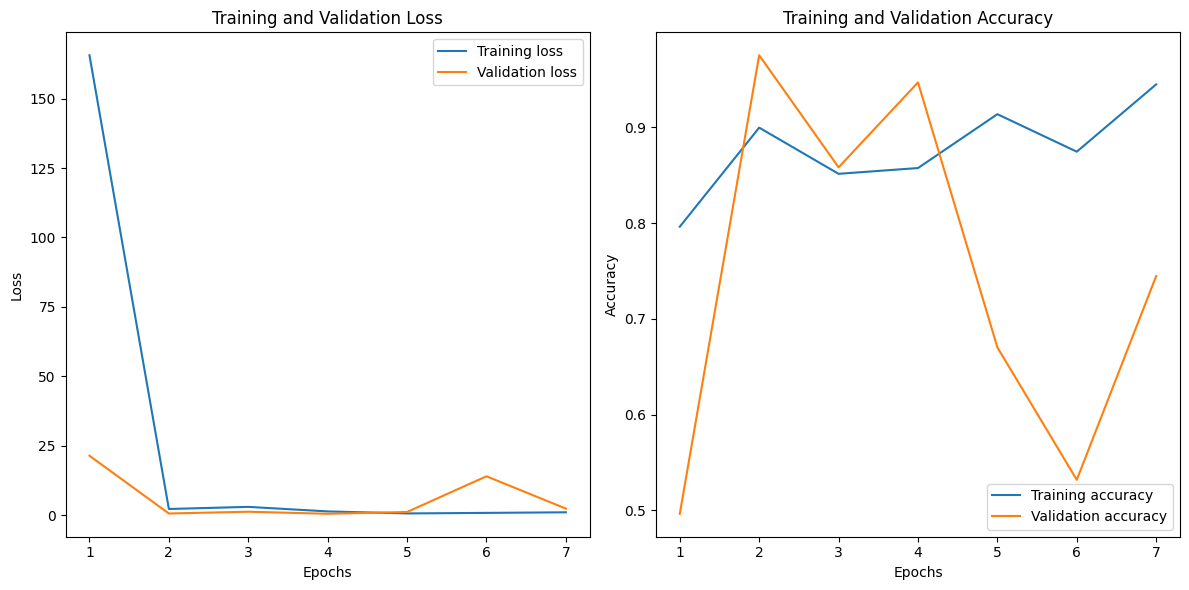

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


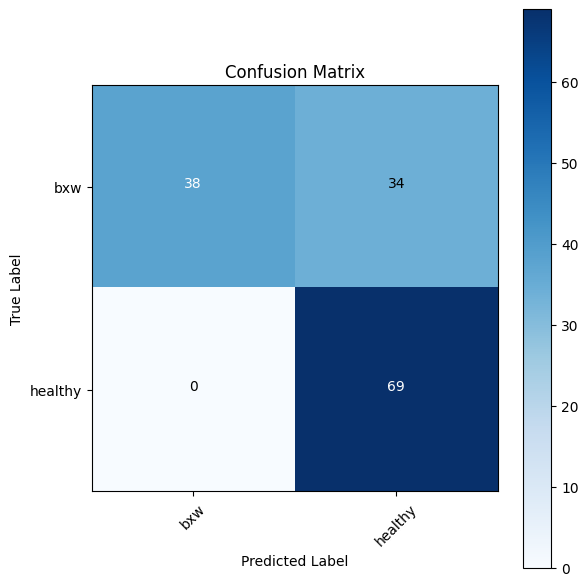

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
              precision    recall  f1-score   support

         bxw       1.00      0.53      0.69        72
     healthy       0.67      1.00      0.80        69

    accuracy                           0.76       141
   macro avg       0.83      0.76      0.75       141
weighted avg       0.84      0.76      0.75       141



In [ ]:
# --- Model 3 definition ---

def model_3(input_shape, num_classes):
    """Creates the model architecture L2 regularization and RMSProp optimizer.
    """
    model = tf.keras.models.Sequential()

    regularizer = tf.keras.regularizers.l2(0.001)  # L2 regularization

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer

    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)  # RMSprop optimizer
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Create the model
model = model_3((128, 128, 3), len(le.classes_))

# Training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)  # Define early stopping
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=10, callbacks=[early_stopping])

# Save the model
model.save("third_model.keras")

# Load the model
loaded_model = tf.keras.models.load_model("third_model.keras")

# ---  Evaluation and Plotting ---

_, test_results = model.evaluate(test_dataset, verbose=0)
_, train_results = model.evaluate(train_dataset, verbose=0)
print('Test accuracy: %.3f, Train accuracy: %.3f' % (test_results, train_results))

# Plotting Function (Loss and Accuracy Curves)
def loss_curve_plot(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  # Loss plot
    plt.plot(epochs, history.history['loss'], label='Training loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)  # Accuracy plot
    plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

loss_curve_plot(history)  # Call the plotting function

# Confusion Matrix and Error Analysis
def plot_confusion_matrix(model, dataset, le):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        y_true.extend(labels.numpy())
        y_pred_batch = model.predict(images)
        y_pred.extend(np.argmax(y_pred_batch, axis=1))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(le.classes_))
    plt.xticks(tick_marks, le.classes_, rotation=45)
    plt.yticks(tick_marks, le.classes_)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(model, test_dataset, le)

# Classification Report
y_true = []
y_pred = []
for images, labels in test_dataset:
  y_true.extend(labels.numpy())
  y_pred_batch = model.predict(images)
  y_pred.extend(np.argmax(y_pred_batch, axis=1))

print(classification_report(y_true, y_pred, target_names=le.classes_)) # Print report


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.6831 - loss: 80.0791 - val_accuracy: 0.9291 - val_loss: 52.5632
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9541 - loss: 52.5486 - val_accuracy: 0.9574 - val_loss: 52.4723
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9685 - loss: 52.4612 - val_accuracy: 0.9752 - val_loss: 52.4369
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9806 - loss: 52.4293 - val_accuracy: 0.9752 - val_loss: 52.4079
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9787 - loss: 52.3788 - val_accuracy: 0.9823 - val_loss: 52.3754
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9921 - loss: 52.3476 - val_accuracy: 0.9823 - val_loss: 52.3518
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9987 - loss: 52.3212 - val_accuracy: 0.9823 - val_loss: 52.3312
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9954 - loss: 52.3019 - val_accuracy: 0.9

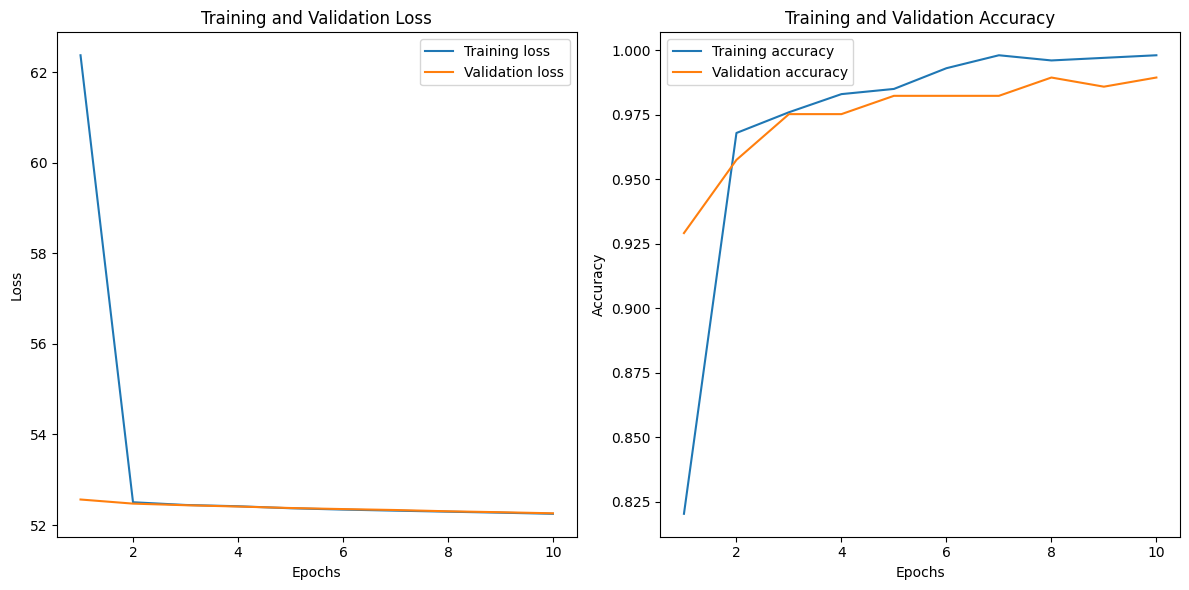

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


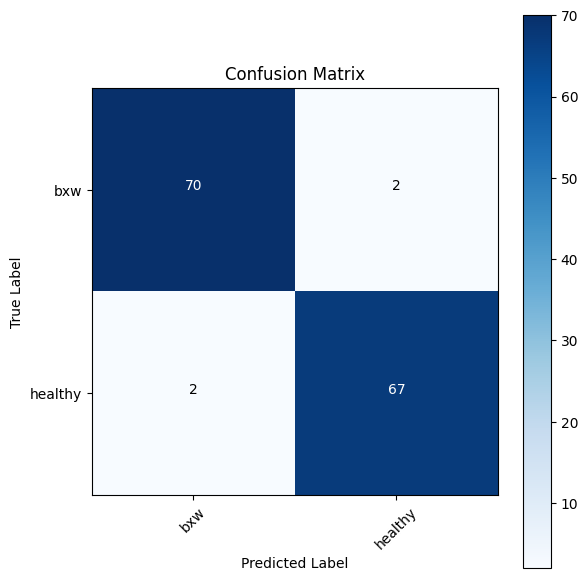

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
              precision    recall  f1-score   support

         bxw       0.97      0.97      0.97        72
     healthy       0.97      0.97      0.97        69

    accuracy                           0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141



In [ ]:
# --- Model 4 definition ---

def model_4(input_shape, num_classes):
    """Creates the model architecture with L1 regularization and SGD optimizer.
    """
    model = tf.keras.models.Sequential()

    regularizer = tf.keras.regularizers.l1(0.001)  # L1 regularization

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizer))

    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)  # SGD optimizer

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# --- Main Execution ---

# Create the model
model = model_4((128, 128, 3), len(le.classes_))

# 5. Training
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=10, callbacks=[early_stopping])

# Save the model
model.save("fourth_model.keras")

# Load the model
loaded_model = tf.keras.models.load_model("fourth_model.keras")

# ---  Evaluation and Plotting ---

_, test_results = model.evaluate(test_dataset, verbose=0)
_, train_results = model.evaluate(train_dataset, verbose=0)
print('Test accuracy: %.3f, Train accuracy: %.3f' % (test_results, train_results))

# Plotting Function (Loss and Accuracy Curves)
def loss_curve_plot(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  # Loss plot
    plt.plot(epochs, history.history['loss'], label='Training loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)  # Accuracy plot
    plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

loss_curve_plot(history)  # Call the plotting function

# Confusion Matrix and Error Analysis
def plot_confusion_matrix(model, dataset, le):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        y_true.extend(labels.numpy())
        y_pred_batch = model.predict(images)
        y_pred.extend(np.argmax(y_pred_batch, axis=1))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(le.classes_))
    plt.xticks(tick_marks, le.classes_, rotation=45)
    plt.yticks(tick_marks, le.classes_)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(model, test_dataset, le)

# Classification Report
y_true = []
y_pred = []
for images, labels in test_dataset:
  y_true.extend(labels.numpy())
  y_pred_batch = model.predict(images)
  y_pred.extend(np.argmax(y_pred_batch, axis=1))

print(classification_report(y_true, y_pred, target_names=le.classes_)) # Print report


              precision    recall  f1-score   support

         bxw       0.99      0.99      0.99        72
     healthy       0.99      0.99      0.99        69

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



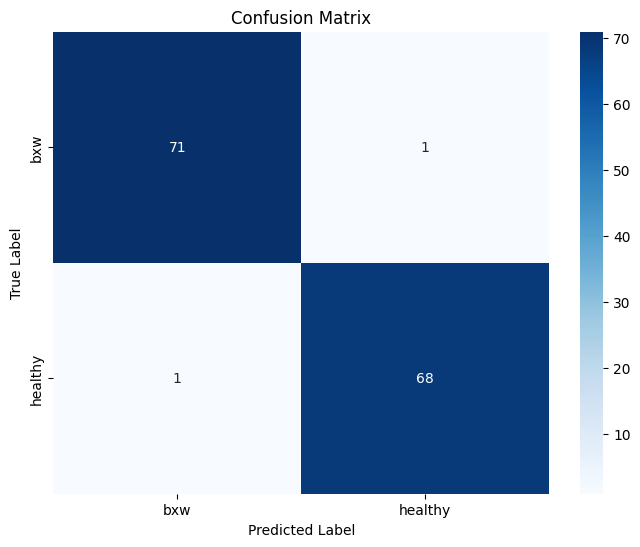

In [ ]:
# --- ML Algorithm that is not a Neural Network --- #

# Data Loading and Preprocessing
data_folders = {
    'train': '/content/dataset/train',
    'validation': '/content/dataset/valid',
    'test': '/content/dataset/test'
}

datasets = {}
le = None

for split, folder in data_folders.items():
    csv_path = os.path.join(folder, '_annotations.csv')
    image_folder = os.path.join(folder, 'images')
    df = pd.read_csv(csv_path)

    if split == 'train':
        le = LabelEncoder()
        df['class_encoded'] = le.fit_transform(df['class'])
    else:
        df['class_encoded'] = le.transform(df['class'])

    image_data = []
    for filename in df['filename']:
        image_path = os.path.join(image_folder, filename)
        try:
            img = plt.imread(image_path)
            img_resized = tf.image.resize(img, [128, 128]).numpy()
            image_data.append(img_resized)
        except FileNotFoundError:
            print(f"Warning: Image not found: {image_path}")
            continue

    image_data = np.array(image_data)
    n_samples = image_data.shape[0]
    image_data_flattened = image_data.reshape(n_samples, -1)
    df_new = pd.DataFrame(image_data_flattened)
    df_new['class_encoded'] = df['class_encoded'].iloc[:n_samples].values

    datasets[split] = df_new

# Prepare Data for Logistic Regression
X_train = datasets['train'].drop('class_encoded', axis=1)
y_train = datasets['train']['class_encoded']

X_validation = datasets['validation'].drop('class_encoded', axis=1)
y_validation = datasets['validation']['class_encoded']

X_test = datasets['test'].drop('class_encoded', axis=1)
y_test = datasets['test']['class_encoded']

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Train the Logistic Regression Model
linear_model = LogisticRegression(max_iter=1000)
linear_model.fit(X_train, y_train)

# Evaluate the Model
y_pred = linear_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)

# Save the model
filename = 'logistic_regression_model.joblib'
dump(model, filename)

# Load the model
# loaded_model = load(filename)

# Improved Confusion Matrix Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
from google.colab import files
import shutil

# Zip the saved_models directory
shutil.make_archive('saved_models', 'zip', 'saved_models')

# Download the zip file
files.download('saved_models.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the models
model_paths = {}
model_1 = tf.keras.models.load_model('saved_models/no_optimization_model.keras')
model_2 = tf.keras.models.load_model('saved_models/second_model.keras')
model_3 = tf.keras.models.load_model('saved_models/third_model.keras')
model_4 = tf.keras.models.load_model('saved_models/fourth_model.keras')
linear_model = joblib.load('saved_models/logistic_regression_model.joblib')

def load_and_evaluate_model(model_path, model_name, test_dataset, le, y_test): # y_test added
    """Loads a saved model, evaluates it using F1 score, and prints performance."""

    try:
        if model_path.endswith(".joblib"):
            model = load(model_path)

            X_test_lr = []
            y_test_lr = []

            for images, labels in test_dataset.as_numpy_iterator():
                X_test_lr.extend(images.reshape(images.shape[0], -1))  # Flatten and extend
                y_test_lr.extend(labels)

            X_test_lr = np.array(X_test_lr)
            y_test_lr = np.array(y_test_lr)

            y_test_lr = y_test

            y_pred = model.predict(X_test_lr)
            f1 = f1_score(y_test_lr, y_pred, average='weighted', zero_division=1)
            print(f"{model_path}: F1 Score: {f1:.3f}")
            return f1

        elif model_path.endswith(".keras"):
            model = tf.keras.models.load_model(model_path)
            y_true = []
            y_pred = []
            for images, labels in test_dataset.as_numpy_iterator():
                y_true.extend(labels.numpy())
                y_pred_batch = model.predict(images)
                y_pred.extend(np.argmax(y_pred_batch, axis=1))

            f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
            print(f"{model_path}: F1 Score: {f1:.3f}")
            return f1
        else:
            print(f"Unknown model file type: {model_path}")
            return None

    except Exception as e:
        print(f"Error: {e}")
        return None

model_results = {}

for name, path in model_paths.items():
    f1 = load_and_evaluate_model(path, name, test_dataset_nn, le, y_test)  # Use NN dataset for NN models, y_test added
    model_results[name] = f1

# --- Sorting, Printing, and Best Model ---

# Sort models by F1 score in descending order, handling None values correctly
sorted_models = sorted(model_results.items(), key=lambda item: item[1] if item[1] is not None else -1, reverse=True)

print("\n--- Model Performance (Sorted by F1 Score) ---")

best_model_name = None
best_f1 = -1  # Initialize with a value lower than any possible F1 score

for name, f1 in sorted_models:
    if f1 is not None:
        print(f"{name}: {f1:.3f}")
        if f1 > best_f1:
            best_f1 = f1
            best_model_name = name
    else:
        print(f"{name}: Evaluation failed")

if best_model_name:
    print(f"\n--- Best Performing Model (based on F1 Score) ---")
    print(f"{best_model_name}: {best_f1:.3f}")
else:
    print("\n--- No models were successfully evaluated. ---")



--- Model Performance (Sorted by F1 Score) ---

--- No models were successfully evaluated. ---


In [ ]:
# Get the best model
best_model_name, best_metrics = metrics_list[0]
print(f"The best model is: {best_model_name} with Accuracy: {best_metrics[0]*100:.2f}%")

# Load the best model
if best_model_name == "Logistic Regression Model":
    best_model = linear_model
else:
    best_model = tf.keras.models.load_model(f'saved_models/{best_model_name.replace(" ", "_").lower()}.keras')

# Use the best model to make predictions
def make_predictions(model, test_dataset):
    predictions = model.predict(test_dataset.batch(32)).argmax(axis=1)
    return predictions

predictions = make_predictions(best_model, test_dataset)

# Print predictions
print("Predictions using the best model:")
print(predictions)

In [ ]:
model_path = None
make_predictions(None)

Congratulations!!
